In [1]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd

In [2]:
# ---------- STEP-1: 読み込み ----------
nii_path = Path("/mnt/nfs1/home/yamamoto-hiroto/research/vertebrae/Sakaguchi_file/proceed_train_prob/inp1003/31/cut_ans1003.nii_prob.nii.gz")
img      = nib.load(str(nii_path))
data     = np.asanyarray(img.dataobj)         # lazy -> ndarray
print("shape:", data.shape, "voxel spacing(mm):", img.header.get_zooms()[:3])

shape: (152, 154, 140) voxel spacing(mm): (np.float32(0.801), np.float32(0.801), np.float32(0.5))


In [3]:
# ---------- STEP-2: 1 枚表示のヘルパ ----------
def show_slice(vol, axis=0, idx=0):
    """axis=0:xSagittal  1:yCoronal  2:zAxial"""
    if axis==0: sl = vol[idx,:,:]
    elif axis==1: sl = vol[:,idx,:]
    else: sl = vol[:,:,idx]
    plt.figure(figsize=(4,4))
    plt.imshow(sl.T, cmap='gray', origin='lower')    # T: (y,x) に転置
    plt.title(f"axis {axis}, slice {idx}")
    plt.axis('off')
    plt.show()

# ---------- STEP-3: スクロール付きビューア ----------
def interactive_view(vol, axis=2):
    max_idx = vol.shape[axis] - 1
    wd.interact(
        lambda idx: show_slice(vol, axis, idx),
        idx=wd.IntSlider(value=max_idx//2, min=0, max=max_idx, continuous_update=False)
    )

interactive_view(data, axis=2)          # 例: axial 方向


interactive(children=(IntSlider(value=69, continuous_update=False, description='idx', max=139), Output()), _do…

In [ ]:
ct_path   = Path("/mnt/nfs1/home/yamamoto-hiroto/research/vertebrae/Sakaguchi_file/proceed_train_prob/inp1003/36/cut_ans1003.nii_prob.nii.gz")
ct_img    = nib.load(str(ct_path))
ct_data   = np.clip(ct_img.get_fdata(), -1000, 1800)    # window
ct_data   = (ct_data + 1000) / 2000                     # 0-1

prob_data = data                                        # 0-1

def overlay_view(idx, alpha=0.4):
    sl_ct   = ct_data[:,:,idx]
    sl_prob = prob_data[:,:,idx]
    plt.figure(figsize=(4,4))
    plt.imshow(sl_ct.T, cmap='gray', origin='lower')
    plt.imshow(sl_prob.T, cmap='hot',  origin='lower', alpha=alpha)
    plt.title(f"Axial z={idx}")
    plt.axis('off')
    plt.show()

wd.interact(overlay_view,
            idx   = wd.IntSlider(min=0, max=ct_data.shape[2]-1, value=ct_data.shape[2]//2),
            alpha = wd.FloatSlider(min=0, max=1, value=0.4, step=0.05))


interactive(children=(IntSlider(value=79, description='idx', max=157), FloatSlider(value=0.4, description='alp…

<function __main__.overlay_view(idx, alpha=0.4)>

Prob  min/max : 0.0 0.9999999997671694  non-zeros: 201055
CT    min/max : -1127.0 2262.0


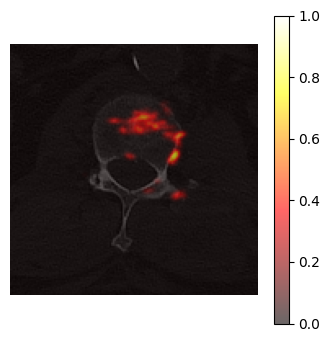

In [5]:
prob_path = Path("/mnt/nfs1/home/yamamoto-hiroto/research/vertebrae/Sakaguchi_file/proceed_train_prob/inp1003/31/cut_ans1003.nii_prob.nii.gz")
ct_path   = Path("/mnt/nfs1/home/yamamoto-hiroto/research/vertebrae/Sakaguchi_file/processed_train/inp1003/31/cut_inp1003.nii.gz")

# 2) 読み込み
prob_img = nib.load(str(prob_path))
ct_img   = nib.load(str(ct_path))

prob = prob_img.get_fdata()
ct   = ct_img.get_fdata()

# 3) 統計を表示
print("Prob  min/max :", prob.min(), prob.max(), " non-zeros:", (prob>0).sum())
print("CT    min/max :", ct.min(),   ct.max())

# 4) 1 スライスだけ描画 (軸=2 が axial)
z = prob.shape[2] // 2
plt.figure(figsize=(4,4))
plt.imshow(ct[:,:,z].T, cmap='gray', origin='lower')
plt.imshow(prob[:,:,z].T, cmap='hot',  origin='lower', alpha=0.6, vmin=0, vmax=1)
plt.axis('off'); plt.colorbar(); plt.show()


In [19]:
mask_path = Path("/mnt/nfs1/home/yamamoto-hiroto/research/vertebrae/Sakaguchi_file/processed_train/inp1003/36/cut_ans1003.nii")
mask_img  = nib.load(str(mask_path))
mask_data = mask_img.get_fdata()

print("mask unique values :", np.unique(mask_data)[:10])
print("non-zero voxels    :", int((mask_data > 0).sum()))


mask unique values : [0.]
non-zero voxels    : 0
